## Improvements to first algorithms
In this notebook will re-write the algorithms with slight improvements to them, such as angles and more flexible input line functions.

Need to implement:
* function takes a top angle and a side length
* choose number of points and lines to plot, which ones to plot
* implement printer that prints all the needed information about a triangle process
* break into more functions
* graph of angle vs constant to find function.

Bugs:
* if start drawing at wrong point in obtuse triangle will draw outside of triangle. [solved]

Implement General functions

In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import random
import heapq

def findFunc(point1, point2):
    """find the linear function that fits two points"""
    if((point1[0] ==0) and (point2[0] == 0)):
        m = "dne"
        b = "dne"
    elif((point1[1] == 0) and (point2[1] == 0)):
        m = 0
        b = 0
    else:
        m = ((point2[1] - point1[1]) / (point2[0] - point1[0]))
        b = (((point2[0] * point1[1]) - (point1[0] * point2[1])) / (point2[0] - point1 [0]))
        
    return m, b

In [2]:
def midpoint(pair1, pair2):
    """find the midpoint between the two given points"""
    x = (pair1[0] + pair2[0])/2
    y = (pair1[1] + pair2[1])/2
    return x, y

In [3]:
def pFunc(m):
    """find function perpindicular to passed function slope"""
    if(m != 0):
        mperp = (-1/m)
        
    if(m == 0):
        mperp = 0
    
    if(m=='dne'):
        mperp = 0
        
    return mperp

In [4]:
def newB(m, point):
    """find adjusted b"""
    b = (point[1] - (m * point[0]))
    return b

In [5]:
def dist(point1, point2):
    """find the distance between the two passed points"""
    dist = math.sqrt((pow((point2[0] - point1[0]), 2)) + ((pow((point2[1] - point1[1]), 2))))
    return dist

In [6]:
def inter(mb1, mb2):
    """find the point of intersection between two functions"""
    x = ((mb2[1] - mb1[1]) / (mb1[0] - mb2[0]))
    y = ((mb1[0] * x) + mb1[1])
    return x, y

In [7]:
def plot(dpi):
    fig, ax=plt.subplots(dpi=dpi)
    #ax.plot([2,4,1,5], label="Label")
    ax.legend()

In [8]:
def return_angles(pnt1, pnt2, pnt3):
    """return all interior angles of passes triangle.  C is altitude (top) angle, A left, B right
    returns A, B, C"""
    
    b = dist(pnt1, pnt2)
    a = dist(pnt2, pnt3)
    c = dist(pnt3, pnt1)
    
    A = math.degrees(math.acos((pow(b, 2) + pow(c, 2) - pow(a, 2)) / (2.0 * b * c)))
    B = math.degrees(math.acos(((pow(c, 2) + pow(a, 2)) - pow(b, 2)) / (2.0 * c * a)))
    C = math.degrees(math.acos(((pow(a, 2) + pow(b, 2)) - pow(c, 2)) / (2.0 * a * b)))
    
    return A, B, C

In [9]:
def return_points(angle1, angle2, right_point):
    """anlge1 is top angle, angle2 is right angle.
    The left point is on origin, the right point is defined by you, the top point is found computationally"""
    
    #find left angle
    angle3 = (180 - angle1) - angle2
    
    #define left line
    m1 = math.tan(math.radians(angle3))
    b1 = 0
    mb1 = [m1, b1]
    
    #define right line
    m2 = -(math.tan(math.radians(angle2)))
    b2 = newB(m2, right_point)
    mb2 = [m2, b2]
    
    # find out when the line defined by left and right side intersect to get your final point.
    pointT = inter(mb2, mb1)
    
    return (0, 0), pointT, right_point

In [49]:
def drawTriangle(steps, startPoint, points, points_to_draw):
    """steps: the number of iterations to go around triangle
    startPoint: the point to start the process from within the triangle
    points: the set of points that define the outer triangle
    points_to_draw: a [start, end] pair that determines the number of steps to graph"""
    
    # current point to draw from
    current_point = startPoint
    # track visited points for graphing
    visited_points = [startPoint]
    
    # define lines of triangle.  Of form [m, b]
    # bottom line is on x axis so don't have to draw it.
    l1 = findFunc(points[0], points[1])
    l2 = findFunc(points[1], points[2])
    
    # define perpindicular functions.  Returns m'
    lp1 = pFunc(l1[0])
    lp2 = pFunc(l2[0])
    
    # start painting loop for n steps
    for i in range(0, steps):
        
        # for each perpendicular line, define the exact function that passes through the current point to find next step
        lOne = [lp1, newB(lp1, current_point)]
        inter1 = inter(l1, lOne)
        
        lTwo = [lp2, newB(lp2, current_point)]
        inter2 = inter(l2, lTwo)
        
        # this corresponds to the botton line which lies along the x axis so need a different function rule for it.  
        inter3 = [current_point[0], 0]
        
        
        dist1 = dist(current_point, inter1)
        dist2 = dist(current_point, inter2)
        dist3 = dist(current_point, inter3)
        
        # use largest to pick the longest distance to travel within triangle
        largest = heapq.nlargest(3, [dist1, dist2, dist3])
        cur_largest = largest[0]
        next_indx = largest.index(cur_largest) + 1
        next_largest = largest[next_indx]
        
        # prevent program from drawing outside of triangle
        while(True):
            if((cur_largest == dist1) and (inter1[1] > points[1][1])):
                cur_largest = largest[next_indx]
            if((cur_largest == dist2) and (inter2[1] > points[1][1])):
                cur_largest = largest[next_indx]
            if((cur_largest == dist3) and (inter3[1] > points[1][1])):
                cur_largest = largest[next_indx]
            else:
                break
            
        # if two distances are the same pick a random one to follow
        if(cur_largest == next_largest):
            # make a random choice between the two
            largest_pick = random.choice([cur_largest, next_largest])

            if(largest_pick == dist1):
                current_point = inter1
                visited_points.append(current_point)

            if(largest_pick == dist2):
                current_point = inter2
                visited_points.append(current_point)

            if(largest_pick == dist3):
                current_point = inter3
                visited_points.append(current_point)
            
        if(cur_largest != next_largest):   
            # if all different distances and within rules, move to the new point
            if(cur_largest == dist1):
                current_point = inter1
                visited_points.append(current_point)
            if(cur_largest == dist2):
                current_point = inter2
                visited_points.append(current_point)
            if(cur_largest == dist3):
                current_point = inter3
                visited_points.append(current_point)
    
    # plot the points of the stepping process
    x = []
    for i in visited_points[points_to_draw[0]:points_to_draw[1]]:
        x.append(i[0])
    
    y = []
    for i in visited_points[points_to_draw[0]:points_to_draw[1]]:
        y.append(i[1])
    
    # plot the outer triangle
    xT = [points[0][0], points[1][0], points[2][0], points[0][0]]
    yT = [points[0][1], points[1][1], points[2][1], points[0][1]]
    
    fig, ax = plt.subplots(dpi=144)
    ax.plot(xT, yT)
    ax.plot(x, y)
    #ax.scatter(x, y)
    plt.xlim(-.5, (points[2][0]+.5))
    plt.ylim(-.5, (points[1][1]+.5))
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.draw

    return visited_points

In [110]:
def give_info(visited_points, points):
    """This function gives information about the inner and outer triangles passed
    visited_points: can use to find inner triangle information
    points: the set of points that defines the outer triangle"""
    
    # outer triangle information
    print("Outer Triangle Information: \n Inner angles: ", [round(i) for i in (return_angles(points[0], points[1], points[2]))])
    
    #print("\nSide lengths: ", \
     #     dist(points[0], points[1]), dist(points[1], points[2]), dist(points[0], points[2]))
    
    if(visited_points[-4:-1] == visited_points[-7:-4]):
        iPoints = visited_points[-4:-1]
        print("\n\nInner Triangle Information: \n Inner angles: ", [round(i) for i in (return_angles(iPoints[0], iPoints[1], iPoints[2]))])
        
        #print("\nInner triangle side lengths: ",\
         #    dist(iPoints[0], iPoints[1]), dist(iPoints[1], iPoints[2]), dist(iPoints[2], iPoints[0]), "\n")
    
    if(visited_points[-4:] == visited_points[-8:-4]):
        mid1 = midpoint(visited_points[-2], visited_points[-3])
        mid1 = [round(i, 6) for i in mid1]
        mid2 = midpoint(visited_points[-1], visited_points[-4])
        mid2 = [round(i, 6) for i in mid2]
        
        if(mid1 == mid2):
            angles = return_angles(visited_points[-1], visited_points[-2], mid1)
            print("\n\nInner angles of each triangle are: ", [round(i) for i in angles])

Outer Triangle Information: 
 Inner angles:  [80, 80, 20]


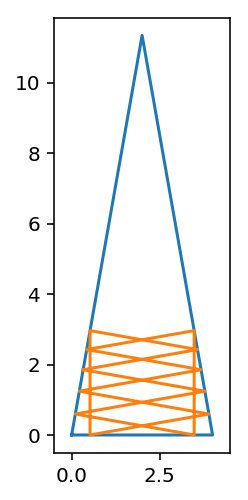

In [111]:
outerT = return_points(20, 80, [4, 0])
visited_points = drawTriangle(113, [2, 0], outerT, [100, 113])
give_info(visited_points, outerT)

Outer Triangle Information: 
 Inner angles:  [50, 50, 80]


Inner Triangle Information: 
 Inner angles:  [50, 50, 80]


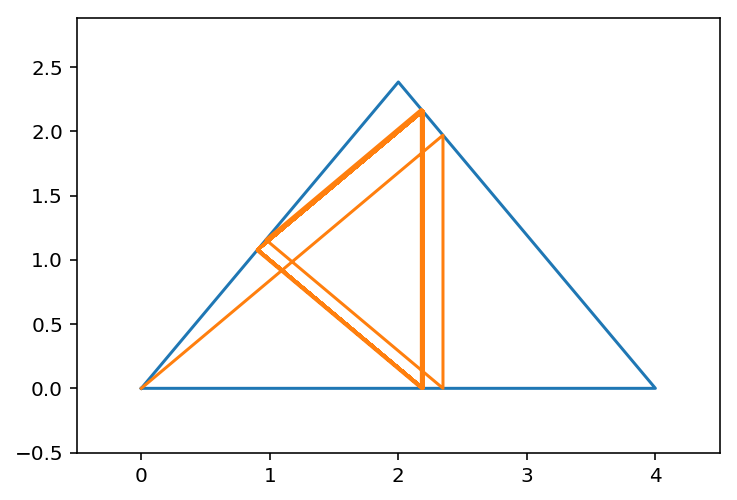

In [114]:
outerT = return_points(80, 50, [4, 0])
visited_points = drawTriangle(110, [0, 0], outerT, [0, 110])
give_info(visited_points, outerT)

Outer Triangle Information: 
 Inner angles:  [40, 40, 100]


Inner angles of each triangle are:  [40, 100, 40]


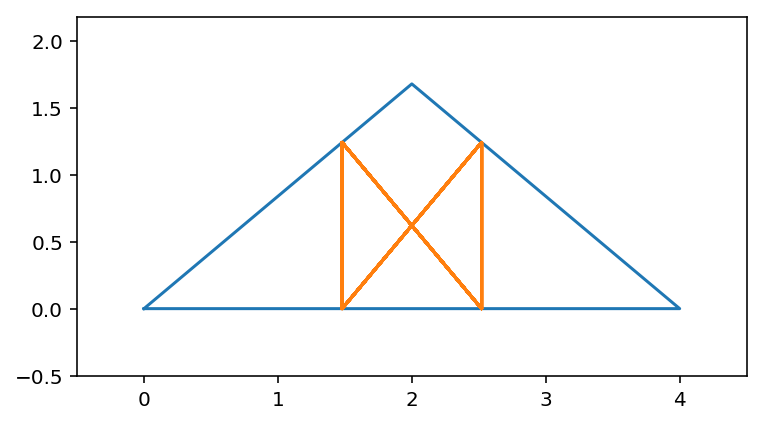

In [113]:
outerT = return_points(100, 40, [4, 0])
visited_points = drawTriangle(150, [3.4, 0], outerT, [100, 150])
give_info(visited_points, outerT)